# **Importing necessary libraries**

In [ ]:
#pandas is a software library written for the Python programming language for data manipulation and analysis. 
#In particular, it offers data structures and operations for manipulating numerical tables and time series.
import pandas as pd
#library to load MATLAB file.77
from scipy.io import loadmat
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays
#and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np
#Visualization library
import matplotlib.pyplot as plt
import matplotlib as mpl
#With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
#The resulting plots will then also be stored in the notebook document
%matplotlib inline
#Visualization and plotting library
import seaborn as sns
sns.set()

In [ ]:
%pip install pyyaml h5py

In [ ]:
#library to ignore warnings which makes outputs clean 
import warnings
warnings.filterwarnings('ignore')

# **Mounting to the Google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Changing path to the location where the datasets are downloaded**

In [ ]:
%cd /content/drive/MyDrive/BTP_Project

# **Dataset 1: Forward Dynamics Dataset Using Baxter**

Datasets gathered from  robotic manipulator, the Rethink Robotics Baxter (one arm, equipped with a parallel gripper). The dataset contain trajectories generated during the execution of pick and place tasks. The pick and place locations were drawn randomly from two non-overlapping areas with size 50 × 50 cm each, as illustrated in the figure below. The robot was considered to have full executed a task by starting and finishing at the same location. The pick and place locations were randomly chosen.

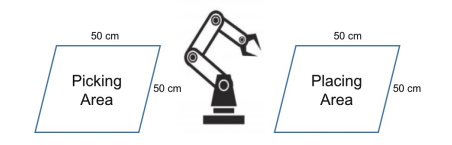

In [ ]:
#loading the matlab file dataset 
mat_FD = loadmat('BaxterDirectDynamics.mat')

In [ ]:
#Displaying loaded matfile
mat_FD

In [ ]:
#Converting mat file into csv
mat_FD = {k:v for k, v in mat_FD.items() if k[0] != '_'}
data_FD = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat_FD.items()})
data_FD.to_csv("BaxterDirectDynamics.csv")

In [ ]:
#Displaying the csv file
data_FD

#Loading the top five rows of the loaded dataset

In [ ]:
#loads the top 5 rows by default .We can give number of rows we want to display inside brackets
data_FD.head()

# In the above dataframe the column names are actually the indexes and the indexes are the columns. We will transpose the DataFrame to make them proper.

## BaxterDirectDynamics 10 trajectories from Rethink Baxter robots

In [ ]:
#Transposing the DataFrame 
data_FD=data_FD.transpose()

In [ ]:
#Displaying the transposed DataFrame
data_FD

In [ ]:
#In the above DataFrame the coulmn names are not clear . We just got 0 to 35 as the column names .

In [ ]:
#Changing the coulmn names according to their entry values present in them 
#Columns: Inputs: 1:7 joint positions 8:14 joint velocities 15:21 joint torques
#Targets: 22:28 joint positions (t+1) 29:35 joint velocities (t+1)
data_FD.columns = ['P_j1_t','P_j2_t','P_j3_t','P_j4_t','P_j5_t','P_j6_t','P_j7_t','V_j1_t','V_j2_t','V_j3_t','V_j4_t','V_j5_t','V_j6_t','V_j7_t','T_j1_t','T_j2_t','T_j3_t','T_j4_t','T_j5_t','T_j6_t','T_j7_t','P_j1_t_1','P_j2_t_1','P_j3_t_1','P_j4_t_1','P_j5_t_1','P_j6_t_1','P_j7_t_1','V_j1_t_1','V_j2_t_1','V_j3_t_1','V_j4_t_1','V_j5_t_1','V_j6_t_1','V_j7_t_1']

In [ ]:
#Displaying DataFrame after renaming coulmns
data_FD

In [ ]:
#In the transpose we have  baxtertraj0,baxtertraj1, ......,baxtertraj9 as the indexes .
#But we dont want those idexes nor we want them in the DataFrame

In [ ]:
#Resetting indexes will remove baxtertraj0,baxtertraj1, ......,baxtertraj9 as indexes and give them as a seperate column
data_FD.reset_index(inplace=True)

In [ ]:
#Displaying DataFrame after resetting indexes
data_FD

In [ ]:
#Dropping the index column
data_FD.drop(['index'],axis=1,inplace=True)

In [ ]:
#Displaying the DataFrame after dropping the index column
data_FD

In [ ]:
#Descriptive statistics of the Dataframe
data_FD.iloc[:,14:].describe()

In [ ]:
data_FD.iloc[:,30:35].describe()

In [ ]:
#info() method prints information about the DataFrame. 
data_FD.info()

# **Data Generation :**There are only 10 rows available in the dataset . We will do synthetic data generation by taking averages of combinations of different rows.

In [ ]:
#For building a Machine Learning Model we need as much data as possible .
#The more the examples we have to show to the model .The more accurate the model predicts the outputs.
#We only have 10 rows in the available Data set which is insuffient to train the model during Model Building.
#We generate more data by preserving the statistical properties of the Original data as much as possible.

In [ ]:
#Creating a new empty DataFrame with column names as data_FD DataFrame
new_data_generated1=pd.DataFrame(columns=data_FD.columns)

In [ ]:
#Displaying the Generated DataFrame
new_data_generated1

In [ ]:
#Creating the new data by taking average of different combinations of rows
for index,row1 in data_FD.iterrows():
    for index,row2 in data_FD.iterrows():
      if row1.equals(row2):
        continue
      row_new = (row1+row2)/2
      new_data_generated1=new_data_generated1.append(row_new,ignore_index=True)

In [ ]:
#Ddisplaying the new_data_generated1
new_data_generated1

In [ ]:
#Taking the 1st 45 rows of the new_data_generated since the rest of the data is just duplicates of the already existing rows
new_data_generated1=new_data_generated1.iloc[:-45 , :]

In [ ]:
#Displaying the updated new_data_generated1
new_data_generated1

In [ ]:
#Creating a new empty DataFrame with column names as data_FD
new_data_generated2=pd.DataFrame(columns=data_FD.columns)

In [ ]:
#Displaying the new_data_generated2 DataFrame
new_data_generated2

In [ ]:
#Using the new_data_generated1 to generate more data by combinations of rows from that DataFrame
for index,row1 in new_data_generated1.iterrows():
    for index,row2 in new_data_generated1.iterrows():
      if row1.equals(row2):
        continue
      row_new = (row1+row2)/2
      new_data_generated2=new_data_generated2.append(row_new,ignore_index=True)

In [ ]:
new_data_generated2

In [ ]:
#Taking the first 960 rows of new_data_generated2 since the rest of the rows are just a duplication of the existing rows 
new_data_generated2=new_data_generated2.iloc[:-960 , :]

In [ ]:
#Displaying the updated new_data_generated2 DataFrame
new_data_generated2

In [ ]:
#Concatenating the data_FD, new_data_generated and new_data_generated2 into a single DataFrame
data_df=pd.concat([data_FD, new_data_generated1,new_data_generated2],ignore_index=True)

In [ ]:
#Displaying the final updated DataFrame df
data_df

In [ ]:
data_df.iloc[12,:]

# Now we have sufficient data to build our model as we go ahead.

In [ ]:
#Descriptive statistics of the original data
data_FD.describe()

In [ ]:
#Descriptive statistics of the final data
data_df.describe()

**Above We see that the most of the statitical properties are almost preserved**

In [ ]:
#Some machine learning models assume that the data to be coming from a normal distribution.
#Models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc., are explicitly calculated from the assumption that the distribution is a bivariate or multivariate normal.
# Also, Sigmoid functions work most naturally with normally distributed data.

In [ ]:

#Histograms of the original data
for i in data_FD.columns:
  plt.figure(figsize=(10,5))
  data_FD[i].hist()
  plt.xlabel(i)
  plt.ylabel('counts')

In [ ]:

#Histograms of the final data
for i in data_df.columns:
  plt.figure(figsize=(10,5))
  data_df[i].hist()
  plt.xlabel(i)
  plt.ylabel('counts')

In [ ]:
#We see that most of the histograms is normally distributed in the above plots in the final data than in the original data.
#which satisfies the normality condition for some Machine Learning algorithms which assume normality in the data

In [ ]:
#info() method prints information about the DataFrame. 
data_df.info()

In [ ]:
#Displaying correlation matrix of DataFrame data_df
data_df.corr()

In [ ]:
corr_df = data_df.corr()

In [ ]:
corr_df.iloc[24:,:]

In [ ]:
# plotting correlation heatmap
#A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, 
#using colored cells to represent data from usually a monochromatic scale.
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(data_df.corr(), annot=True, linewidths=.5, ax=ax)

In [ ]:
#Displaying the column names of data_df
data_df.columns

In [ ]:
#Displaying the input columns of the data_df DataFrame
data_df.iloc[:,0:21]

In [ ]:
#taking the output columns into targets 
targets = data_df.iloc[:,21:]

In [ ]:
#Displaying the targets DataFrame
targets

In [ ]:
#Displaying the column names of the targets DataFrame
targets.columns

# Outlier Detection and removal

In [ ]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(25,20)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=data_df, columns_list=data_df.columns, rows=7, cols=5, suptitle='Boxplots')

In [ ]:
Q1 = data_df.quantile(0.25)
Q3 = data_df.quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

In [ ]:
data_filtered = data_df[~((data_df < (Q1 - 1.5 * IQR)) |(data_df > (Q3 + 1.5 * IQR))).any(axis=1)]
display(data_df.shape)
display(data_filtered.shape)

In [ ]:
data_filtered.reset_index()

In [ ]:
data_filtered = data_filtered.iloc[:,0:]

In [ ]:
data_filtered.head()

In [ ]:
data_filtered.describe()

In [ ]:
data_filtered.info()

In [ ]:
data_df=pd.DataFrame(columns=data_FD.columns)

In [ ]:
data_df
#Creating the new data by taking average of different combinations of rows
for index,row1 in data_filtered.iterrows():
      data_df=data_df.append(row1,ignore_index=True)

In [ ]:
data_df

In [ ]:
data_df.to_csv("pca_train_data.csv")

# **Model Building**

# ***ANN model for predicting output positions and velocities***

In [ ]:
data_df.iloc[:,21:].head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# splitting the data into train ,test ,validation sets in ratio 81:10:9
X_train, X_test, y_train, y_test = train_test_split(data_df.iloc[:,:21], data_df.iloc[:,21:], test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1) 

In [ ]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
# Save the number of columns in predictors: n_cols
n_inputs =X_train.shape[1]
print(n_inputs)

In [ ]:
n_outputs=y_train.shape[1]
print(n_outputs)

In [ ]:
# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='tanh', input_shape=(n_inputs,)))
# Add the second layer
model.add(Dense(32,activation='tanh'))
# Add the output layer
model.add(Dense(n_outputs))

#compiling model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse', 'mae'])

In [ ]:
# mean_squared_error - mse
# mean_absolute_error - mae
# mean_absolute_percentage_error - mape

In [ ]:
X_train.shape

In [ ]:
import os
import tensorflow as tf

In [ ]:
checkpoint_path = "/content/drive/MyDrive/BTP_Project/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history=model.fit(X_train,y_train,batch_size =93, epochs =8,verbose=2,validation_data=(X_val, y_val),callbacks=[cp_callback])
# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['mse'],label='training mse')
pyplot.plot(history.history['val_mse'],label="validation mse")
plt.legend(loc="upper right")
pyplot.show()

In [ ]:
pyplot.plot(history.history['mae'],label="training mae")
pyplot.plot(history.history['val_mae'],label="validation mae")
plt.legend(loc="upper right")
pyplot.show()

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [ ]:
# Loads the weights
model.load_weights(checkpoint_path)
# Re-evaluate the model
print("Evaluate on test data")
result= model.evaluate(X_test, y_test, verbose=2)
print("test loss, test acc:",result)

In [ ]:
X_test[:3]

In [ ]:
X_test.dtypes

In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print(predictions)
print("predictions shape:", predictions.shape)

In [ ]:
y_test[:3]

# ***Model Building for Detecting Anomaly***

In [ ]:
data_anomaly = data_df.iloc[:,21:]

In [ ]:
for i in data_anomaly.columns: 
  plt.figure()
  sns.boxplot(data_anomaly[i], color='blue')

In [ ]:
print("Highest allowed\n",data_df.mean() + 1.5*data_df.std())
print("Lowest allowed\n",data_df.mean() - 1.5*data_df.std())

In [ ]:
inbounds_df=((targets<(targets.mean() + 1.5*targets.std())) & (targets>(targets.mean() - 1.5*targets.std())))

In [ ]:
inbounds_df=inbounds_df.astype(int)

In [ ]:
inbounds_df.head()

In [ ]:
outlier =pd.DataFrame(inbounds_df.sum(axis=1))

In [ ]:
outlier

In [ ]:
data_anomaly["outlier"]=(outlier!=14).astype(int)

In [ ]:
data_anomaly.tail(50)

In [ ]:
data_anomaly['outlier'].value_counts()

In [ ]:
# class count
class_count_1, class_count_0 = data_anomaly['outlier'].value_counts()
print("class_count_0",class_count_0)
print("class_count_1",class_count_1)
# Separate class
class_0 = data_anomaly[data_anomaly['outlier'] == 0]
class_1 = data_anomaly[data_anomaly['outlier'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

In [ ]:
class_0_over = class_0.sample(class_count_1, replace=True)
test_over = pd.concat([class_0_over, class_1], axis=0)
test_over['outlier'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
data_anomaly = test_over

In [ ]:
data_anomaly.outlier.shape

In [ ]:
data_anomaly.outlier.sum()

In [ ]:
predictors=data_anomaly.iloc[:,:-1]

In [ ]:
output=data_anomaly.iloc[:,-1]

In [ ]:
# splitting the data into train ,test ,validation sets in ratio 3:1:1
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(predictors, output, test_size=0.1, random_state=1)
X_train_a, X_val_a, y_train_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.1, random_state=1) 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
DT_clf = DecisionTreeClassifier(criterion='gini',max_depth=27)
DT_clf.fit(X_train_a,y_train_a)
y_pred_a_DT=DT_clf.predict(X_test_a)
# Accuracy score is the simplest way to evaluate
print(accuracy_score(y_pred_a_DT, y_test_a))
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(y_pred_a_DT, y_test_a))
print(classification_report(y_pred_a_DT, y_test_a))

In [ ]:
RF_clf = RandomForestClassifier(max_depth=24)
RF_clf.fit(X_train_a,y_train_a)
y_pred_a_RF=RF_clf.predict(X_test_a)
# Accuracy score is the simplest way to evaluate
print(accuracy_score(y_pred_a_RF, y_test_a))
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(y_pred_a_RF, y_test_a))
print(classification_report(y_pred_a_RF, y_test_a))

In [ ]:
XGB_clf=XGBClassifier(max_depth=25)
XGB_clf.fit(X_train_a,y_train_a)
y_pred_a_XGB=XGB_clf.predict(X_test_a)
# Accuracy score is the simplest way to evaluate
print(accuracy_score(y_pred_a_XGB, y_test_a))
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(y_pred_a_XGB, y_test_a))
print(classification_report(y_pred_a_XGB, y_test_a))

In [ ]:
SVM_clf= SVC(kernel='sigmoid')
LR_clf = LogisticRegression()

In [ ]:
SVM_clf.fit(X_train_a,y_train_a)
LR_clf.fit(X_train_a,y_train_a)

In [ ]:
y_pred_a_SVM=SVM_clf.predict(X_test_a)
# Accuracy score is the simplest way to evaluate
print(accuracy_score(y_pred_a_SVM, y_test_a))
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(y_pred_a_SVM, y_test_a))
print(classification_report(y_pred_a_SVM, y_test_a))

In [ ]:
y_pred_a_LR=LR_clf.predict(X_test_a)
# Accuracy score is the simplest way to evaluate
print(accuracy_score(y_pred_a_LR, y_test_a))
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(y_pred_a_LR, y_test_a))
print(classification_report(y_pred_a_LR, y_test_a))

In [ ]:
# Set up the model: model
model_a = Sequential()

# Add the first layer
model_a.add(Dense(32,activation='sigmoid', input_shape=(14,)))

# Add the second layer
model_a.add(Dense(16,activation='relu'))
# Add the output layer
model_a.add(Dense(1,activation='sigmoid'))

#compiling model
model_a.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
X_train_a.shape

In [ ]:
history=model_a.fit(X_train_a,y_train_a,batch_size =100, epochs =8,verbose=2,validation_data=(X_val_a, y_val_a))

In [ ]:
print("Evaluate on test data")
results = model_a.evaluate(X_test_a, y_test_a)
print("test loss, test acc:", results)

In [ ]:
y_pred_a_ANN=model_a.predict(X_test_a)

In [ ]:
y_pred_a_ANN

In [ ]:
y_pred_a_ANN[y_pred_a_ANN>=0.7] =1
y_pred_a_ANN[y_pred_a_ANN<0.7] =0

In [ ]:
y_pred_a_ANN=y_pred_a_ANN.astype(int)
y_pred_a_ANN

In [ ]:
import pickle

In [ ]:
# create an iterator object with write permission - model.pkl
with open('clf_model.pkl', 'wb') as files:
    pickle.dump(DT_clf, files)

# **Building pipeline to deploy**

Deployed on streamlit :
Link to web App: https://chittoorking-btp-project-main-hsbmkx.streamlitapp.com/